# 0.0 IMPORTS

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import datetime
import math
import inflection
from matplotlib                 import pyplot as plt
from IPython.display            import Image
warnings.filterwarnings( 'ignore' )

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    warnings.filterwarnings( 'ignore' )
    %matplotlib inline
    %pylab inline
    
    plt.rcParams["figure.figsize"] = (25, 20)
    plt.title("y=mx+c")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
        
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set() 

## 0.2 Loading Data

In [3]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False )
df_store_raw   = pd.read_csv('data/store.csv', low_memory=False )

#merge dataset

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [4]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

# 1.0 PASSO 1 - DESCRIÇÃO DOS DADOS

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']
#function to rename columns
snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old) )

df1.columns = cols_new

## 1.2 Data Dimensions

In [7]:
print(f'Number of rows {df1.shape[0]}')
print(f'Number of columns {df1.shape[1]}')

Number of rows 1017209
Number of columns 18


## 1.3 Data Types

In [8]:
#transfomar a coluna date em formato data
df1['date'] = pd.to_datetime(df1['date'])
df1.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## 1.4 Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [10]:
#competition_distance - A estratégia é considerar a maior distancia possivel
df1['competition_distance'] =  df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

#competition_open_since_month - A estratégia para as colunas de data nesse primeiro ciclo é assumir a data de registro 
#para os NA's, por ser uma coluna importante para o passo de Feature engeneering

df1['competition_open_since_month'] =  df1.apply( lambda x: x['date'].month if math.isnan( x ['competition_open_since_month'] ) 
                                                                                 else x['competition_open_since_month'], axis=1 )

#competition_open_since_year - - A estratégia é assumir a data de registro para os NA's 
df1['competition_open_since_year'] =  df1.apply( lambda x: x['date'].year if math.isnan( x ['competition_open_since_year'] ) 
                                                                                 else x['competition_open_since_year'], axis=1 )

#promo2_since_week        

df1['promo2_since_week'] =  df1.apply( lambda x: x['date'].week if math.isnan( x ['promo2_since_week'] ) 
                                                                                 else x['promo2_since_week'], axis=1 )

#promo2_since_year
df1['promo2_since_year'] =  df1.apply( lambda x: x['date'].year if math.isnan( x ['promo2_since_year'] ) 
                                                                                 else x['promo2_since_year'], axis=1 )

#Promo interval - Estratégia criar uma variavel com os meses, comparar como dataset e verificar se a loja participa ou não da promoção
#trocando o nome número pelo nome do mês 
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

#Preenchendo os NAs com 0
df1['promo_interval'].fillna(0, inplace=True)

#Extraindo mês da data e aplica o dict para fazer a tradução
df1['month_map'] = df1['date'].dt.month.map( month_map)

#Verificar se o month_map está dentro de promo_interval criar a coluna is_promo: 1 para verdadeiro e 0 falso
df1['is_promo' ] = df1[[ 'promo_interval', 'month_map' ]].apply (lambda x: 0 if x[ 'promo_interval' ] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1)


## 1.6 Change Type

In [11]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( 'int64' )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( 'int64' )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( 'int64' )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( 'int64' )

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical

In [12]:
#Separa os dados em numéricos  e categóricos
num_attributes = df1.select_dtypes( include= ['int64', 'float64', 'int32'] )

cat_attributes = df1.select_dtypes( exclude= ['int64', 'float64', 'int32', 'datetime64[ns]'] )

### 1.7.1 Numerical Attributes

In [13]:
#Central Tendence - Mean, Median

ct1 = pd.DataFrame( num_attributes.apply( np.mean) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis - complementa as informações para saber como os dados estão em relação as tendencias centrais
d1 = pd.DataFrame( num_attributes.apply( np.std) ) .T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ) .T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ) .T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate

m = pd.concat( [d2, d3, d4, ct1, ct2,d1, d5, d6 ] ).T.reset_index()

#Rename Columns
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']


In [14]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


Analisando a tabela e avaliar as variáveis
 -- Analisando a variável sales: 
     Percebe-se que o minimo é 0, ou seja não houve nenhuma venda( possivelmente porque a loja estava fechada) Max= 41551.0, 
     O range é a diferença entre o min e o max.
     A média e mediana estão bem parecidas, ou seja, o deslocamento da curva está simetrico, não há uma grande variação
     Isso é representado pela skew, pois ela está muito próxima de 0, ou seja, proxima de uma normal
     E pela kurtosis que está próxima de 1
-- Analisando a variável competition_Distance: 
      A média e mediana estão muito diferentes, ou seja,há uma grande variação nos dados e o deslocamento da curva está mais pra direita.
     Isso é representado pela skew, pois ela está muito distante de 0
     E pela kurtosis que está distante de 1
     
     Isso acontece porque há muitos competidores próximos

<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

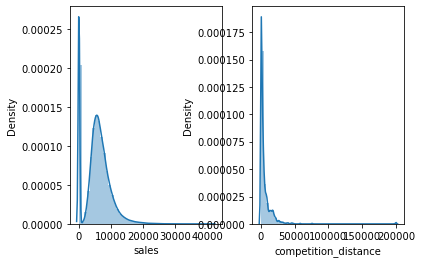

In [15]:
# Representando graficamente
plt.subplot(1, 2, 1)
#plt.figure(figsize=(12,7))
sns.distplot( df1['sales'])

plt.subplot(1, 2, 2)
#plt.figure(figsize=(12,7))
sns.distplot( df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [16]:
# Niveis de variaveis categoricas
cat_attributes.apply(lambda x:x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

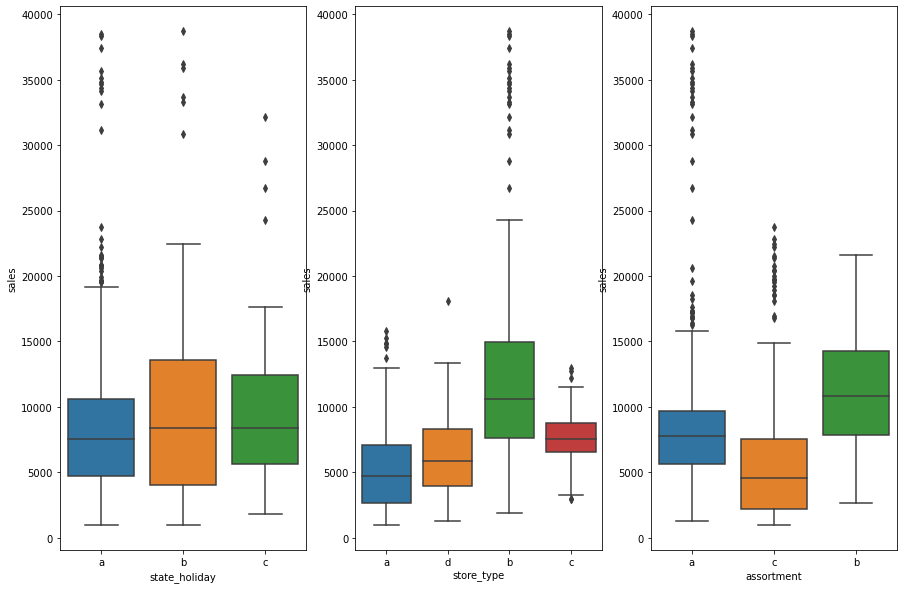

In [17]:
#Verificar as estatistica descritivas das variaveis categoricas
aux1 = df1[ ( df1['state_holiday'] != '0') & (df1['sales']> 0)] #Pegar as vendas maior que zero
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot( x='store_type', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot( x='assortment', y='sales', data=aux1)

Analisando os graficos:
State_ Holiday: o feriado b tem a mediana maior que a do a, mas é muito parecida como c.No feriado b há um equilibrio de vendas. Porém no c há um volume maior vendas a partir do quartil 50 ao 75.


Store_type:  a loja do tipo b tem mais outliers e a mediana de vendas é maior do que as outras lojas. Já nas outras lojas as vendas estão concentradas em torno da mediana

Assortment: a loja b tem um mix de produtos muito mais distribuido na loja b e a loja a tem mais outliers

# 2.0 PASSO 02 - FEATURE ENGINEERING


In [20]:
df2 =  df1.copy()
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,0


## 2.1 Mapa Mental de Hipóteses

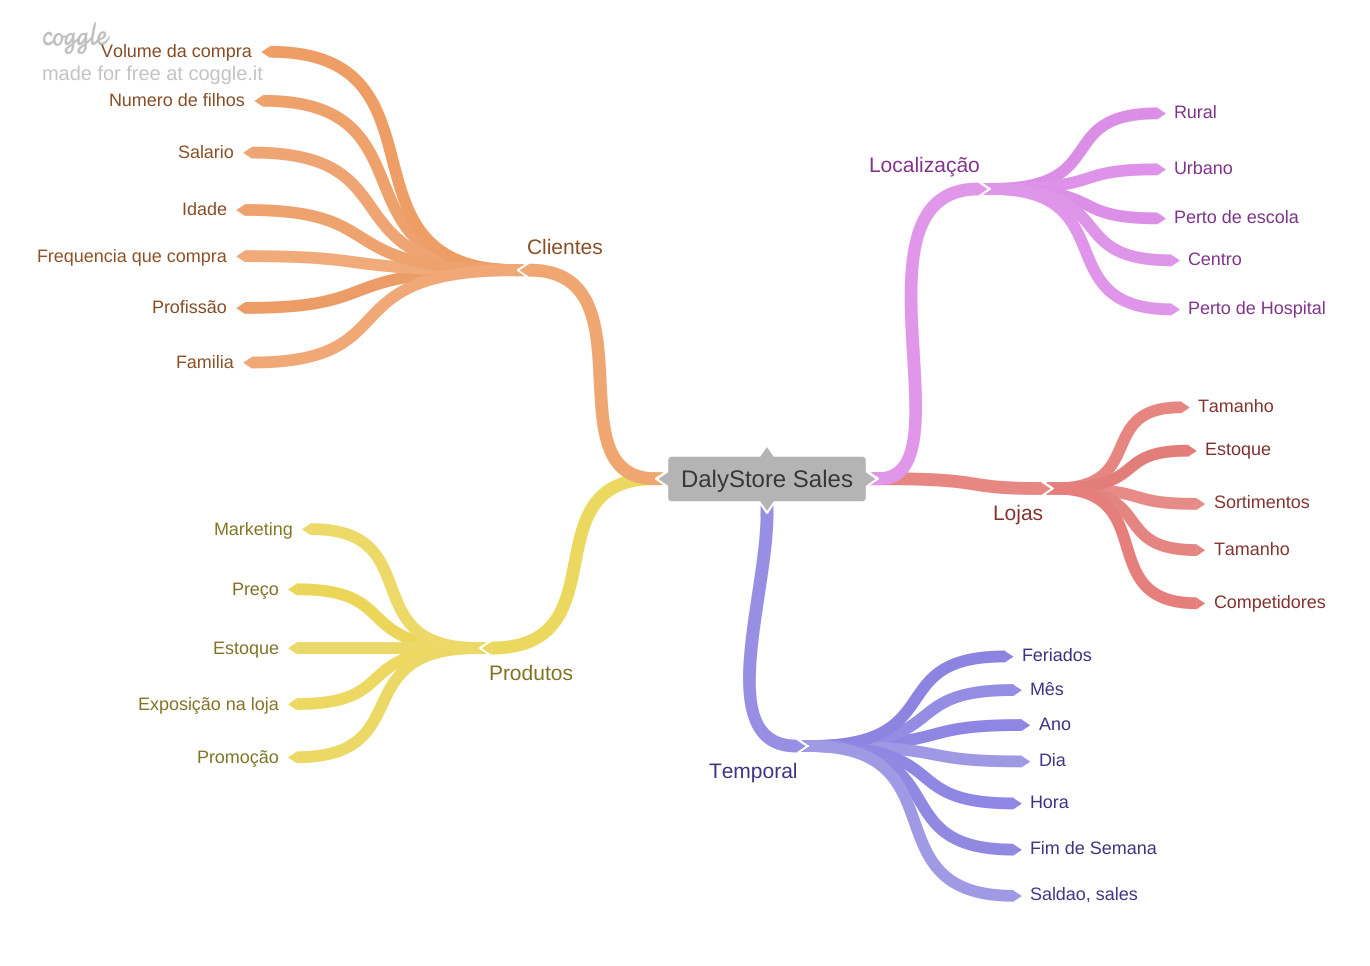

In [23]:
Image('img/mindmaphypotesis.png')

## 2.2 Criação da hipóteses

## 2.1.1 Hipoteses Loja

1. Lojas com maior quadro de funcionários deveriam vender mais.

2. Lojas com maior estoque maior deveriam vender mais

3. Lojas com maior porte deveriam vender mais

4. Lojas com menor porte deveriam vender menos

5. Lojas com maior sortimento (variedade) deveriam vender mais

6. Lojas com menor distancia entre os competidores deveriam vender menos

7. Lojas com competidores a mais tempo deveriam vender mais.

## 2.1.3 Hipoteses Produtos

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas que tem uma vitrine maior deveriam vender mais.

**3.** Lojas com menores preços deveriam vender mais.

**4.** Lojas que com menores preços por mais tempo deveriam vender mais.

**5.** Lojas que com promoção deveriam vender mais.

**6.** Lojas que com mais dias de promoção deveriam vender mais.


## 2.1.2 Hipoteses Tempo

**1.** Feriados impactam negativamente nas vendas.

**2.** Lojas que atendem aos finais de semana deveriam vender mais.

**3.** Lojas que abrem nos primeiros 6 meses deveriam vender mais.

**4.** Lojas deveriam vender mais ao longo dos anos.

**5.** Lojas deveriam vender mais após o dia 10.

**6.** Lojas deveriam vender menos durante feriados escolares.



## 2.2 Lista final de Hipóteses

**1.** Lojas com maior sortimento (variedade) deveriam vender mais.

**2.** Lojas com menor distancia entre os competidores deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais.

**4.** Lojas que com menores preços por mais tempo deveriam vender mais.

**5.** Lojas que com mais dias promoção deveriam vender mais.

**6.** Lojas que com mais dias de promoção consecutivas deveriam vender mais.

**7.** Feriados impactam negativamente nas vendas.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais após o dia 10.

**9.** Lojas deveriam vender menos durante feriados escolares.

**10.** Lojas everiam vender menos aos finais de semana.


**11.** Lojas deveriam vender mais no feriado de natal.


**12.** Lojas deveriam vender mais no segundo semestre.




## 2.3 Feature Engeneering

In [24]:
df2.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [27]:
#year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# Week of year
df2['week_of_year'] = df2['date'].dt.weekofyear
# Year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

#competition since 
df2['competition_since'] = df2.apply( lambda x: datetime.datetime(year=x['competition_open_since_year'], 
                                                                  month=x['competition_open_since_month'], 
                                                                  day=1),axis=1 )
 
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30).apply( lambda x: x.days ).astype( int )

#Promo since (Variaveis que apontam quando a promoção ficou ativa)
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-'+ df2['promo2_since_week'].astype( str )

df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1','%Y-%W-%w' )- datetime.timedelta( days=7 ))

df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7).apply( lambda x: x.days).astype( int )

# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

#state holiday

df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'Christmas' if x == 'c'else 'regular_day')


In [28]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [29]:
df3 =df2.copy()

In [30]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das linhas

In [31]:
#Filtrar os dias em que as lojas estavam fechadas
df3 = df3[ ( df3['open'] != 0 ) &  (df3['sales'] > 0 )]

## 3.2 Selecao das colunas

In [32]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']

df3 = df3.drop( cols_drop, axis=1 )